In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mupsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df = pd.read_csv(r'...') #40,000 rows
df_sub=df.sample(500) #random subset for model construction

Text(0, 0.5, 'Frequency')

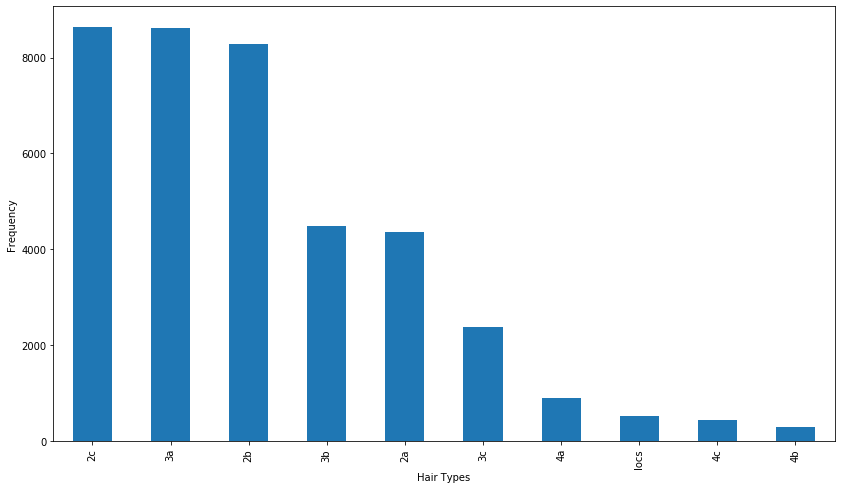

In [6]:
ax=df['hairtype'].value_counts().plot(kind='bar',figsize=(14,8))
ax.set_xlabel("Hair Types")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

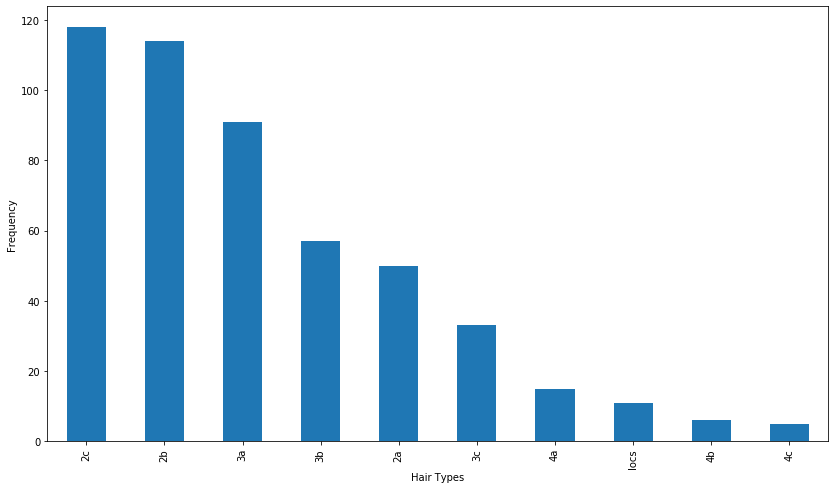

In [7]:
ax=df_sub['hairtype'].value_counts().plot(kind='bar',figsize=(14,8))
ax.set_xlabel("Hair Types")
ax.set_ylabel("Frequency")

In [8]:
tokenizer = RegexpTokenizer(r'\w+') #instantiate tokenizer
lemmatizer = WordNetLemmatizer() #instantiate lemmatizer

In [9]:
#tokenize and lemmatize each post
lemmatized_txt = []
for post in df_sub['text_body']:
    tokens=tokenizer.tokenize(post.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_txt.append(" ".join(lemmatized))

In [10]:
# add back to df
df_sub['lemmatized_txt']=lemmatized_txt

In [11]:
# make sure lemmatization worked
df_sub['lemmatized_txt'].head(20) 

8418     i like the idea curl typing isn t an exact sci...
19009    your hair is gorgeous and i would agree with t...
27606    2a 2b pal do you have any reference photo for ...
14824                                   look like 3a to me
8698     2a 2b person here i ve been doing cgm for the ...
11427    your hair is definitely wavy and or curly enou...
1221     i ve got 2a wavy hair which ha been weighed do...
32179    do you find it s worth paying for fancy brush ...
7334     frizzy hair is dry hair trying to get moisture...
2565     i m really excited because i finally got some ...
34218    dealing with curly hair at the beach i m on my...
13280    what type of hair do you have i want to buy th...
26411    curl wave without tangle i just found this sub...
20219    my mum is a stylist and ha been the only perso...
30947    how to air dry without weighing down my hair 2...
33192    just realized my hair is curly hi everyone i a...
3193     do you sotc after your hair is dry you don t s.

In [12]:
# any rows with URLs in them?
df_sub[df_sub['lemmatized_txt'].str.contains('http')]

,Unnamed: 0,Unnamed: 0.1,author,id,permalink,created_utc,text_body,parent_id,hairtype,num_comments,num_crossposts,selftext,title,lemmatized_txt
28658,28658,3168,cslrc,dadxqj,/r/curlyhair/comments/dadxqj/anime_characters_...,1569663473,Anime characters with realistic looking Type 3...,notext,2b,1,0,In anime you have plenty of characters with na...,Anime characters with realistic looking Type 3...,anime character with realistic looking type 3 ...
34447,34447,8957,littlecuterose,ctld9p,/r/curlyhair/comments/ctld9p/hydrating_treetea...,1566414201,Hydrating Treetea+ Mint is one of the best pro...,notext,3a,2,0,"I have 3a-3c hair for starters, so it might no...",Hydrating Treetea+ Mint is one of the best pro...,hydrating treetea mint is one of the best prod...
33709,33709,8219,ColourOutOfSpace87,atykht,/r/curlyhair/comments/atykht/i_used_to_think_m...,1550947394,"I used to think my hair was straight, now look...",notext,3a,2,0,&amp;#x200B; https://i.redd.it/inorm3vk4di21....,"I used to think my hair was straight, now look...",i used to think my hair wa straight now look a...
27745,27745,2255,LittleWing0802,ap0ns8,/r/curlyhair/comments/ap0ns8/new_to_cg_greasy_...,1549772800,"New to CG - greasy on day 2 with low porosity,...",notext,2b,0,0,I’ve only done a couple washes since trying ou...,"New to CG - greasy on day 2 with low porosity,...",new to cg greasy on day 2 with low porosity th...
5320,5320,5320,Beat_Punch_Beef,eln1wpq,/r/curlyhair/comments/bgq1v9/hair_wont_stay_cu...,1556091018,"Man. Down to the dry, desert climate, the hair...",t3_bgq1v9,2b,notext,notext,notext,notext,man down to the dry desert climate the hair ty...
38468,38468,12978,blakerich,91m1wa,/r/curlyhair/comments/91m1wa/help_with_finding...,1532471125,Help With Finding a Hair StyleI am an outgoing...,notext,4a,6,0,I am an outgoing and confident sophomore in hi...,Help With Finding a Hair Style,help with finding a hair stylei am an outgoing...
18071,18071,18071,officergiraffe,f7n1mjm,/r/curlyhair/comments/dwygqy/what_am_i_doing_w...,1573880825,Also a type 2 (2c-3a) here with difficult curl...,t3_dwygqy,3a,notext,notext,notext,notext,also a type 2 2c 3a here with difficult curl i...
5730,5730,5730,WeAreStarless,eqr3wso,/r/curlyhair/comments/bz8es2/please_help_me_cu...,1560246823,i unfortunately don't have any hairstyle recom...,t3_bz8es2,2b,notext,notext,notext,notext,i unfortunately don t have any hairstyle recom...
2035,2035,2035,jessicaXjulie,f0t802y,/r/curlyhair/comments/d42tl8/hard_water/f0t802y/,1568917494,I figured I'd post an update and may help othe...,t3_d42tl8,2a,notext,notext,notext,notext,i figured i d post an update and may help othe...
483,483,483,AzureShell,e190kxl,/r/curlyhair/comments/8srp8p/the_weekly_no_que...,1529909212,"Hello, new to the sub, wanting to try somethin...",t3_8srp8p,2a,notext,notext,notext,notext,hello new to the sub wanting to try something ...


In [13]:
# remove URLs
df_sub['lemmatized_txt'] = df_sub['lemmatized_txt'].str.replace('http\S+',"")

In [14]:
#instantiate tfidfVectorizer & fit_transform
tfidf = TfidfVectorizer(stop_words='english', tokenizer=None)
tfidf_vectors = tfidf.fit_transform(lemmatized_txt)

In [15]:
tfidf.get_feature_names()

['000425197518',
 '06808acbdd4df52a40ee389c060a47291500240142',
 '07',
 '09',
 '0f',
 '0r6sm8',
 '10',
 '100',
 '1000000',
 '100g',
 '10min',
 '10mins',
 '11',
 '119270',
 '12',
 '12oz',
 '13',
 '130',
 '14',
 '1483617293',
 '15',
 '1568917355',
 '16',
 '17',
 '18',
 '185',
 '19',
 '1944',
 '19f',
 '1a',
 '1b',
 '1bqci5a0kxi',
 '1c',
 '1f',
 '1q6dj9wazxlfbhjsys5on2rw3',
 '1x',
 '20',
 '200',
 '2010',
 '2011',
 '2011_canary',
 '20120319045502',
 '20130123111357',
 '20130622010332',
 '2014',
 '20150130102537',
 '20150901183220',
 '2016',
 '20160905224901',
 '2017',
 '20170808143559',
 '20180430112359',
 '20luvers',
 '20min',
 '21',
 '2217097',
 '22h28m24s215',
 '2300023',
 '25',
 '2511327',
 '258661721',
 '27',
 '27s_fire_nation_outfit',
 '28',
 '29f',
 '2a',
 '2b',
 '2bhello',
 '2c',
 '2ci',
 '2in1',
 '2nd',
 '2x',
 '30',
 '32',
 '329',
 '33',
 '330000200000483271',
 '330000200001235134',
 '334035',
 '339ce80448',
 '34',
 '349061583299',
 '35897',
 '365',
 '38',
 '3a',
 '3b',
 '3c',
 '3

In [16]:
tfidf.vocabulary_

{'like': 2214,
 'idea': 1916,
 'curl': 988,
 'typing': 3925,
 'isn': 2039,
 'exact': 1343,
 'science': 3259,
 'fact': 1387,
 'cg': 695,
 'community': 847,
 'ha': 1723,
 'moved': 2481,
 'away': 380,
 'type': 3921,
 'head': 1788,
 'picture': 2748,
 'harder': 1765,
 'classify': 764,
 'modeled': 2445,
 'heat': 1804,
 'styled': 3613,
 'hair': 1731,
 'eye': 1377,
 'say': 3243,
 '2a': 65,
 '2b': 66,
 'weird': 4120,
 'wavy': 4101,
 'went': 4123,
 'majority': 2312,
 'just': 2079,
 'best': 477,
 'guess': 1707,
 'hope': 1872,
 'helped': 1820,
 'gorgeous': 1661,
 'agree': 227,
 '2c': 68,
 '3a': 86,
 'pal': 2676,
 'reference': 3043,
 'photo': 2740,
 'haircut': 1735,
 'thinking': 3766,
 'getting': 1622,
 'layered': 2168,
 'bob': 524,
 'sure': 3650,
 'll': 2240,
 'look': 2257,
 'okay': 2602,
 'end': 1300,
 'looking': 2259,
 'poofy': 2814,
 'share': 3340,
 'really': 3008,
 'helpful': 1821,
 'person': 2731,
 've': 4013,
 'doing': 1189,
 'cgm': 698,
 'past': 2697,
 'month': 2468,
 'varying': 4010,
 'deg

In [17]:
df_sparse = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf.get_feature_names())
df_sparse.shape

(500, 4264)

In [18]:
# print top 50 words from tfidf
topwords = pd.DataFrame(df_sparse.sum().sort_values(ascending=False).nlargest(50), columns=['frequency'])
print(topwords)

             frequency
hair         54.173576
curl         26.066668
product      18.998691
like         18.699705
2c           18.173102
3a           18.084364
2b           16.731216
just         16.118082
gel          16.083652
use          16.019480
conditioner  15.885385
look         15.463543
ve           13.256742
dry          12.996640
wa           12.983127
shampoo      12.972231
day          12.355791
curly        12.247353
3b           11.550556
don          10.690026
wash         10.669832
really       10.565040
type         10.536581
2a           10.301894
ha           10.207357
porosity     10.184361
oil          10.077434
help          9.707688
low           9.548412
leave         9.503450
think         9.495778
wave          9.421220
moisture      9.309019
routine       9.199507
work          9.163095
fine          9.009415
3c            8.842918
wavy          8.503207
good          8.340178
using         8.327649
time          8.034971
know          7.923130
used       

Text(0.5, 0, 'Word Frequency')

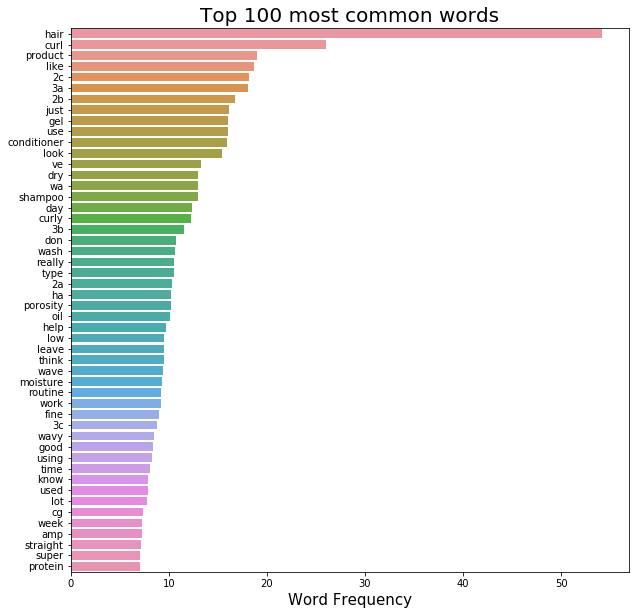

In [19]:
# plot to view top words
plt.figure(figsize=(10,10))
ax=sns.barplot(x='frequency', y=topwords.index, data=topwords)
ax.set_title('Top 100 most common words', fontsize=20)
ax.set_xlabel('Word Frequency', fontsize=15)